In [18]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from netgraph import Graph
import Classes.EditableMatrix as em

Number of states:  2
Nodes:  [1, 2]


Button(description='Add Node', style=ButtonStyle())

Button(description='Remove Node', style=ButtonStyle())

Output()

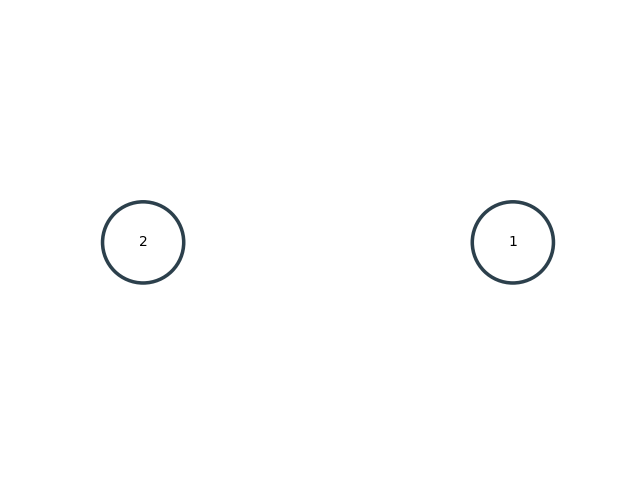

In [19]:
# using widgets to create a graph of the statespace with networkx

#maximum number of players:
MAX_STATES = 10

%matplotlib widget

# create a plot without the axes
fig, ax = plt.subplots()

# set up graph
graph = nx.DiGraph()
edges = []
edge_labels = {}

# graph plotting
def plot_graph(G):
    ax.clear()
    Graph(G, node_labels=True, node_layout='circular', edge_layout='arc',
          node_size=6, edge_width=0.5, arrows=True, node_label_fontdict=dict(size=10), edge_label_position=0.1, edge_labels_rotate=True)

# Add buttons and output to add and remove nodes
add_node = widgets.Button(description='Add Node')
remove_node = widgets.Button(description='Remove Node')
output_states = widgets.Output()
n_states = 2
nodes = [1, 2]
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)
print("Number of states: ", n_states)
print("Nodes: ", nodes)
plot_graph(graph)

# Display output
def on_add_button_clicked(b):
    global n_states 
    if n_states >= MAX_STATES:
        output_states.clear_output(True)
        with output_states:
            

            print("Number of states: ", n_states, "\n"+"Maximum number of states reached!")
        return
    n_states += 1
    with output_states:
        output_states.clear_output(True)
        print("Number of states: ", n_states)
        graph.add_node(n_states)
        print("Nodes: ", graph.nodes)
        plot_graph(graph)

def on_remove_button_clicked(b):
    global n_states
    if n_states <= 2:
        output_states.clear_output(True)
        with output_states:
            print("Number of states: ", n_states, "\n"+"Minimum number of states reached!")
        return 
    n_states -= 1
    with output_states:
        output_states.clear_output(True)
        print("Number of states: ", n_states)
        graph.remove_node(n_states+1)
        plot_graph(graph)

# Display buttons
display(add_node, remove_node, output_states)

# Function to extract nodes and edges from output from widgets
def extract_new_nodes_edges():
    global nodes
    global edges
    nodes = list(graph.nodes)
    edges = list(graph.edges)
    return nodes, edges

add_node.on_click(on_add_button_clicked)
remove_node.on_click(on_remove_button_clicked)

plt.show()

GridBox(children=(Label(value=''), HBox(children=(Button(icon='minus-square', layout=Layout(height='40px', mar…

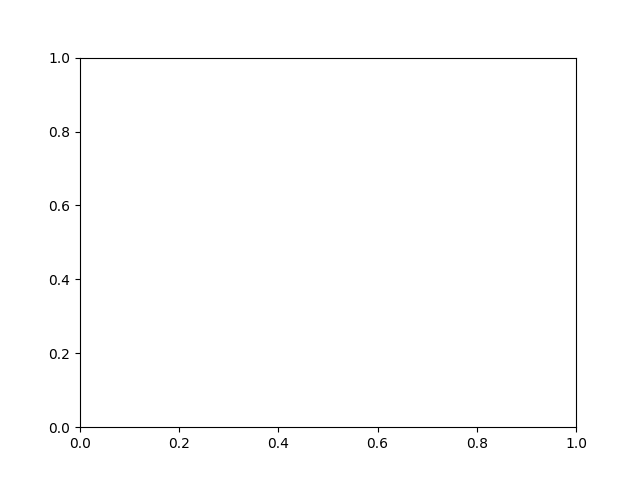

{'name': 'value', 'old': 0.0, 'new': 1.0, 'owner': FloatText(value=1.0, layout=Layout(align_items='center', justify_content='center', width='50px')), 'type': 'change'}
Adding node  1
Adding edge  1 1
{'name': 'value', 'old': 0.0, 'new': 1.0, 'owner': FloatText(value=1.0, layout=Layout(align_items='center', justify_content='center', width='50px')), 'type': 'change'}
Adding node  2
Adding edge  2 1
{'name': 'value', 'old': 1.0, 'new': 2.0, 'owner': FloatText(value=2.0, layout=Layout(align_items='center', justify_content='center', width='50px')), 'type': 'change'}


In [33]:
fig, ax = plt.subplots()
graph = nx.DiGraph()
Gedges = []
Gnodes = nodes
edge_labels = {}

%matplotlib widget

# Matrix filling
def MatrixFiller(targetMatrix, n):
    matrix = []
    for i in range(n):
        row = []
        for j in range(n):
            text = widgets.FloatText(
                value='0',
                placeholder='Type something',
                disabled=False,
                layout=widgets.Layout(width='50px')
            )
            def on_value_change(change):
                targetMatrix[i][j] = change['new']
                print(targetMatrix)

            text.observe(on_value_change, names='value')
            row.append(text)
        matrix.append(row)
    return matrix

def update_graph(graph, edge_labels):
    ax.clear()
    Graph(graph, 
          node_labels=True, 
          edge_labels=edge_labels,
          node_layout='circular', 
          edge_layout='arc',
          node_size=6, 
          edge_width=0.5, 
          arrows=True, 
          arrowsize=70, 
          node_label_fontdict=dict(size=6),
          edge_label_fontdict=dict(size=6), 
          edge_label_position=0.1, 
          edge_labels_rotate=True)

def update_matrix(mat, change):
    print(change)
    matrix = mat.get_data()
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j][0] != 0:
                a = (i + 1)
                b = (j + 1)
                if (a, b) not in graph.edges:
                    if a not in graph.nodes:
                        print("Adding node ", a)
                        graph.add_node(a)
                        Gnodes.append(a)
                    if b not in graph.nodes:
                        print("Adding node ", b)
                        graph.add_node(b)
                        Gnodes.append(b)
                    print("Adding edge ", a, b)
                    graph.add_edge(a, b)
                    Gedges.append((a, b))
                    # str_label = '(' + str(i) + ', ' + str(j) + '): ' + str(matrix[i][j][0])
                    if edge_labels.get((a,b)) is None:
                        # edge_labels[(a, b)] = str_label
                        edge_labels[(a, b)] = str(matrix[i][j][0])
                    else:
                        # edge_labels[(a, b)] = edge_labels[(a, b)] + '\n' + str_label
                        edge_labels[(a, b)] = edge_labels[(a, b)] + '\n' + str(matrix[i][j][0])
                    update_graph(graph, edge_labels)
                elif edge_labels.get((a,b)) != matrix[i][j][0]:
                    edge_labels[(a, b)] = str(matrix[i][j][0])
                    update_graph(graph, edge_labels)
            if matrix[i][j][0] == 0:
                a = (i + 1)
                b = (j + 1)
                if (a, b) in graph.edges:
                    print("Removing edge ", a, b)
                    graph.remove_edge(a, b)
                    Gedges.remove((a, b))
                    del edge_labels[(a, b)]
                    """
                    # if edge_labels[(a, b)] contains actio1, action2 and probability
                    for line in edge_labels[(a, b)].split('\n'):
                        if str(i) == line[1] and str(j) == line[4]:
                            edge_labels[(a, b)] = edge_labels[(a, b)].replace(line, '')
                    """
                    update_graph(graph, edge_labels)

out = widgets.Output(layout={'border': '1px solid black'})
matrix = em.EditableMatrix(n_states, n_states, output=out, onValueChange=update_matrix)
display(matrix.get_widget())